In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [11]:
# read csv file
d1 = pd.read_csv('card transactions.csv')

In [14]:
# read csv file
data = pd.read_csv('card transactions.csv')

In [5]:
data.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud'],
      dtype='object')

In [18]:
d1.shape

(96753, 10)

In [5]:
d1.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.00,P,3.62,0
1,2,5142183973,2006-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.00,P,31.42,0
2,3,5142131721,2006-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.00,P,178.49,0
3,4,5142148452,2006-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.00,P,3.62,0
4,5,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.00,P,3.62,0


In [6]:
d1.describe()

,Recnum,Cardnum,Merch zip,Amount,Fraud
count,96753.00,96753.00,92097.00,96753.00,96753.00
mean,48377.00,5142201786.82,44706.60,427.89,0.01
std,27930.33,55670.84,28369.54,10006.14,0.10
min,1.00,5142110002.00,1.00,0.01,0.00
25%,24189.00,5142152067.00,20855.00,33.48,0.00
50%,48377.00,5142195612.00,38118.00,137.98,0.00
75%,72565.00,5142246089.00,63103.00,428.20,0.00
max,96753.00,5142847398.00,99999.00,3102045.53,1.00


In [7]:
dict_value_counts = {}
for i in d1.columns.to_list():
    dict_value_counts[i]=d1[i].value_counts()

In [8]:
dict_value_counts

{'Recnum': 1        1
 64500    1
 64509    1
 64508    1
 64507    1
         ..
 32250    1
 32249    1
 32248    1
 32247    1
 96753    1
 Name: Recnum, Length: 96753, dtype: int64,
 'Cardnum': 5142148452    1192
 5142184598     921
 5142189108     663
 5142297710     583
 5142223373     579
               ... 
 5142306704       1
 5142135021       1
 5142276358       1
 5142142008       1
 5142233066       1
 Name: Cardnum, Length: 1645, dtype: int64,
 'Date': 2006-02-28    684
 2006-08-10    610
 2006-03-15    594
 2006-09-13    564
 2006-09-07    536
              ... 
 2006-11-07     11
 2006-10-03     10
 2006-01-16      9
 2006-10-17      6
 2006-12-26      6
 Name: Date, Length: 365, dtype: int64,
 'Merchnum': 930090121224     9310
 5509006296254    2131
 9900020006406    1714
 602608969534     1092
 4353000719908    1020
                  ... 
 2000021670061       1
 6731000199309       1
 9813800006594       1
 3065107420906       1
 3500000006160       1
 Name: Merchnum, 

In [9]:
dict_unique = {}
for i in d1.columns.to_list():
    dict_unique[i]=len(d1[i].unique())

In [10]:
dict_unique

{'Recnum': 96753,
 'Cardnum': 1645,
 'Date': 365,
 'Merchnum': 13092,
 'Merch description': 13126,
 'Merch state': 228,
 'Merch zip': 4568,
 'Transtype': 4,
 'Amount': 34909,
 'Fraud': 2}

In [11]:
dict_populated = {}
for i in d1.columns.to_list():
    dict_populated[i] = d1[i].count()/len(d1)*100

In [12]:
dict_populated

{'Recnum': 100.0,
 'Cardnum': 100.0,
 'Date': 100.0,
 'Merchnum': 96.51173607019938,
 'Merch description': 100.0,
 'Merch state': 98.76489617892985,
 'Merch zip': 95.1877461163995,
 'Transtype': 100.0,
 'Amount': 100.0,
 'Fraud': 100.0}

In [13]:
d2 = d1.drop(['Amount','Recnum'],axis=1)

In [14]:
for i in d2.columns.to_list():
    d2[i]=d2[i].astype(str)

In [15]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Cardnum            96753 non-null  object
 1   Date               96753 non-null  object
 2   Merchnum           96753 non-null  object
 3   Merch description  96753 non-null  object
 4   Merch state        96753 non-null  object
 5   Merch zip          96753 non-null  object
 6   Transtype          96753 non-null  object
 7   Fraud              96753 non-null  object
dtypes: object(8)
memory usage: 5.9+ MB


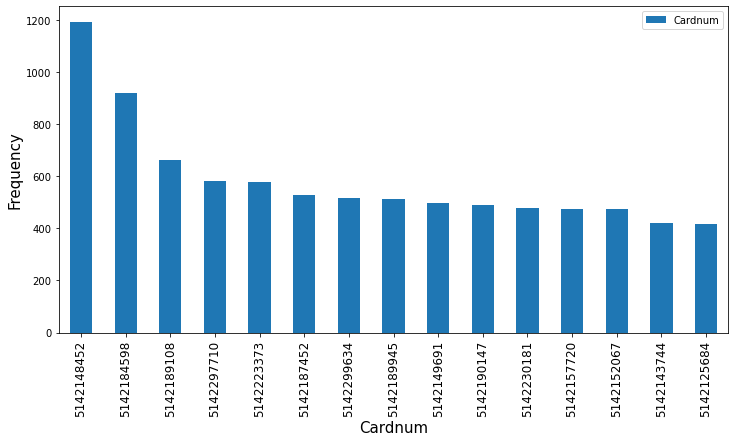

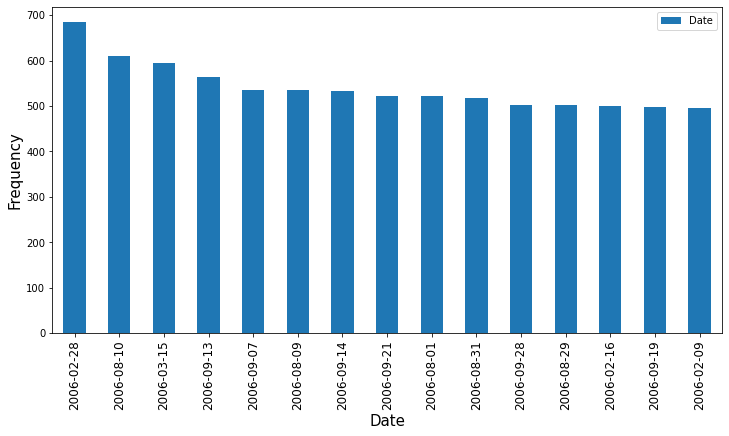

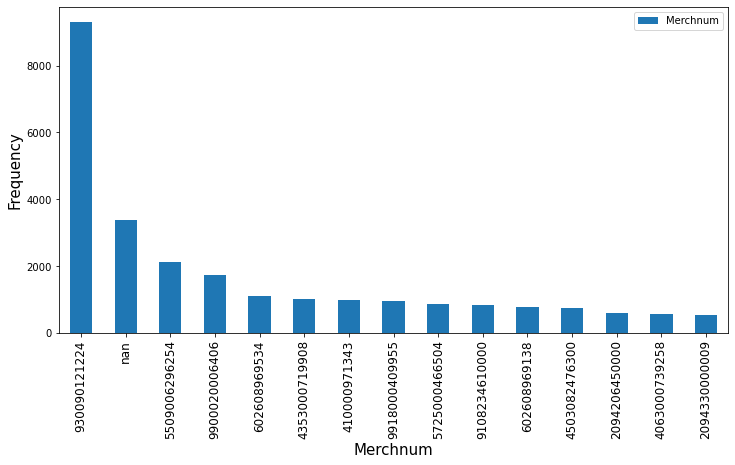

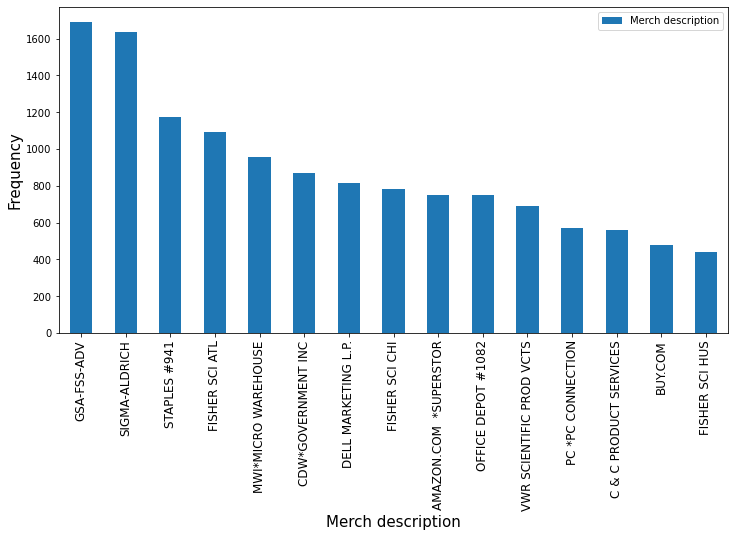

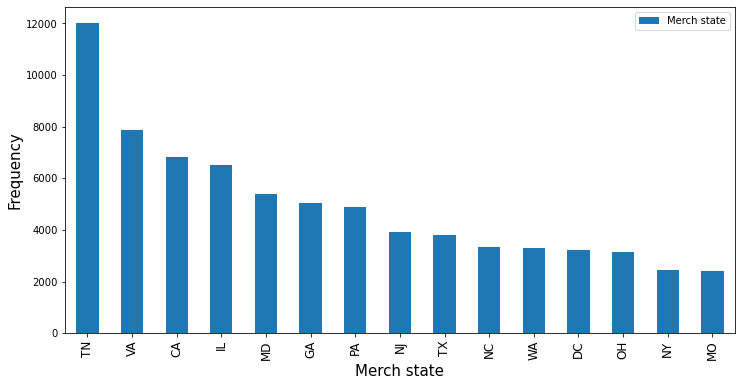

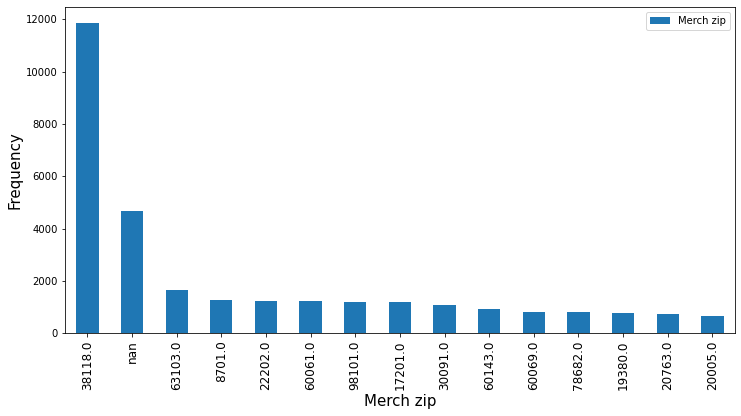

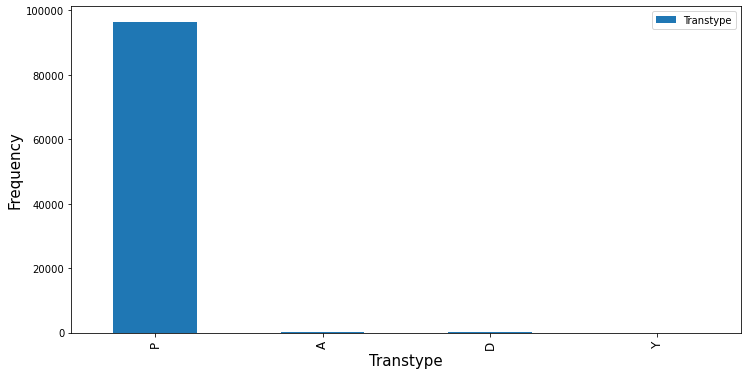

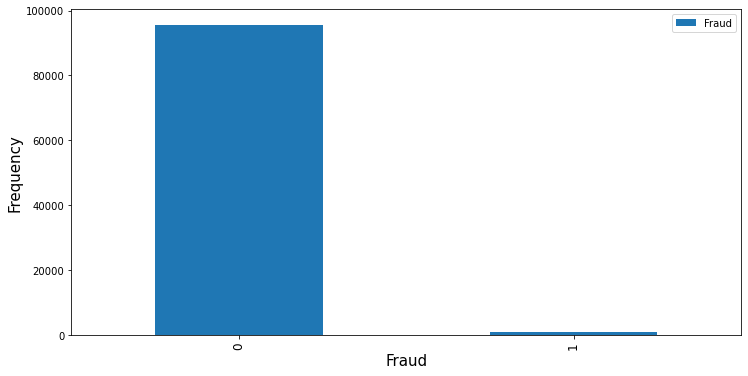

In [19]:
categoricalVar=d2.columns.tolist()
for col in categoricalVar:
    df = pd.DataFrame(d2[col].value_counts().sort_values(ascending=False).head(15))
    df.plot(kind='bar',figsize=(12,6))
    plt.xlabel(col,fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.xticks(fontsize=12)

Text(0.5, 0, 'Amount')

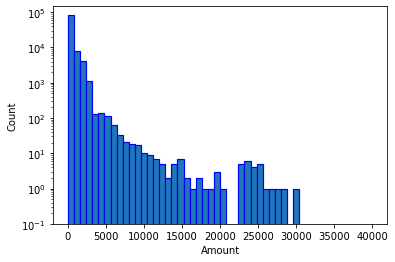

In [20]:
plt.hist(d1['Amount'],bins=50,range=[0,40000],edgecolor='blue',linewidth=1.2)
plt.yscale('log')
plt.ylim(bottom = .1)
plt.ylabel('Count')
plt.xlabel('Amount')

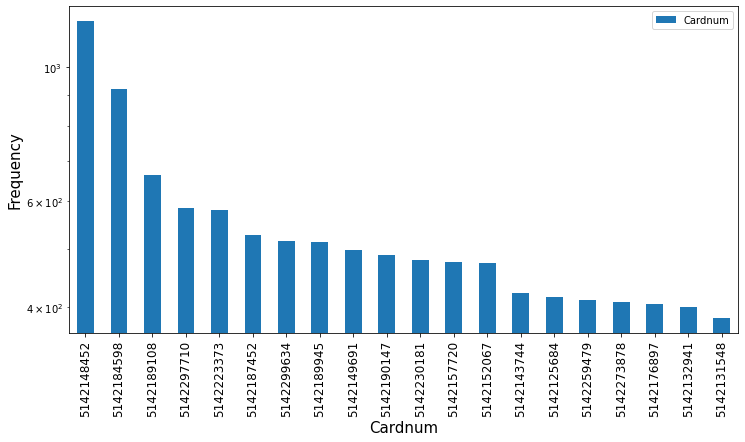

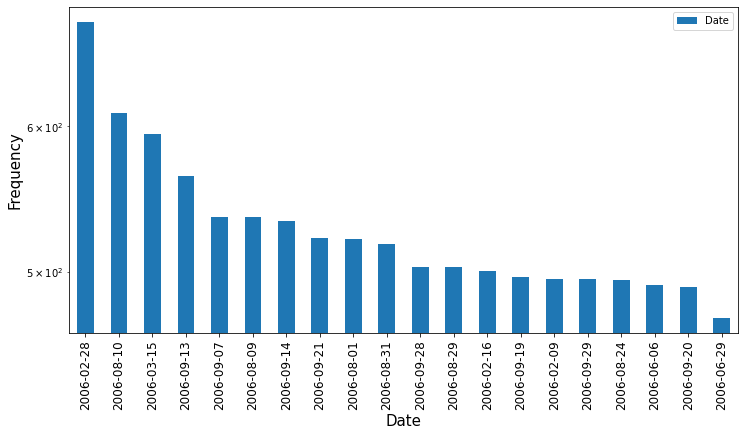

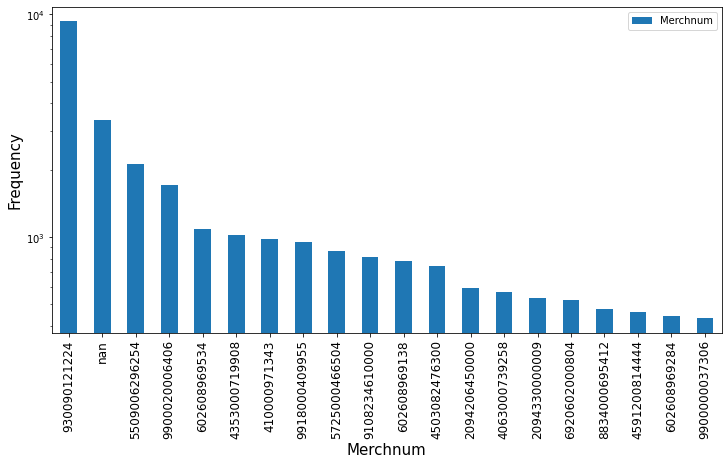

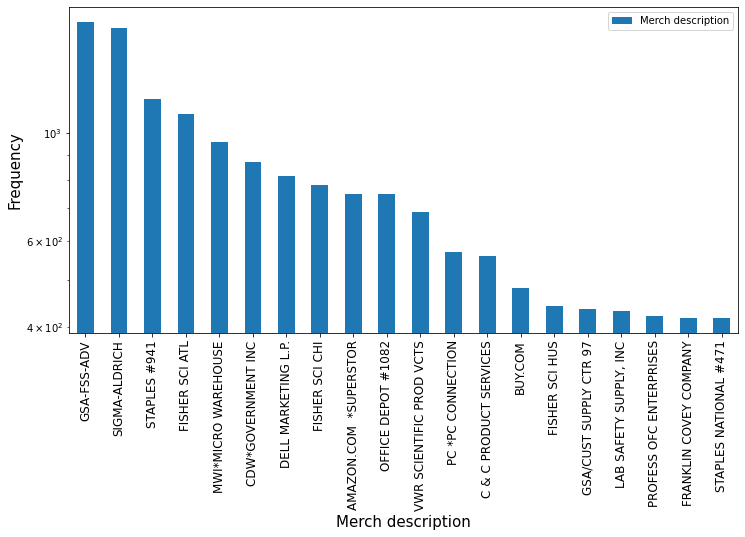

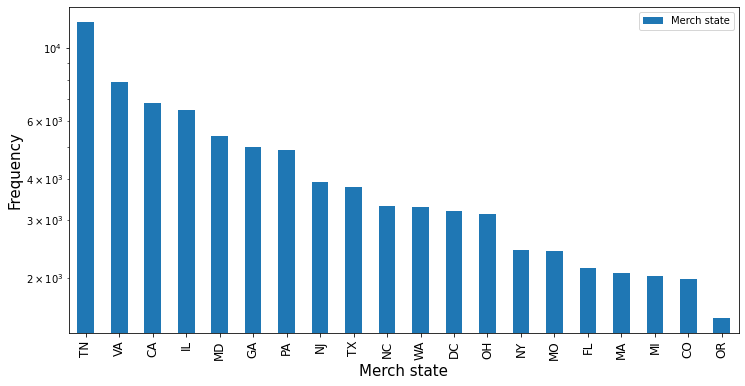

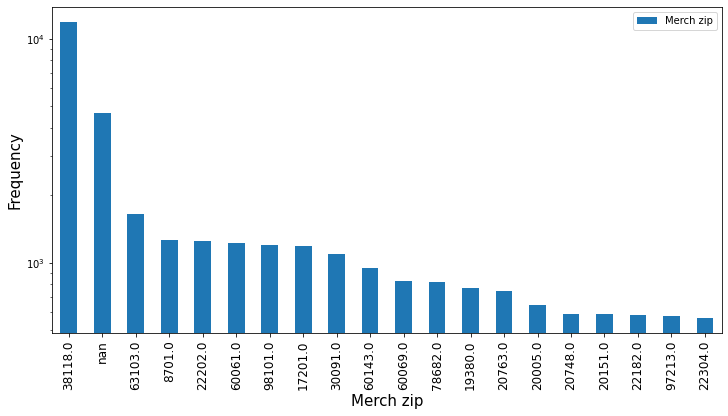

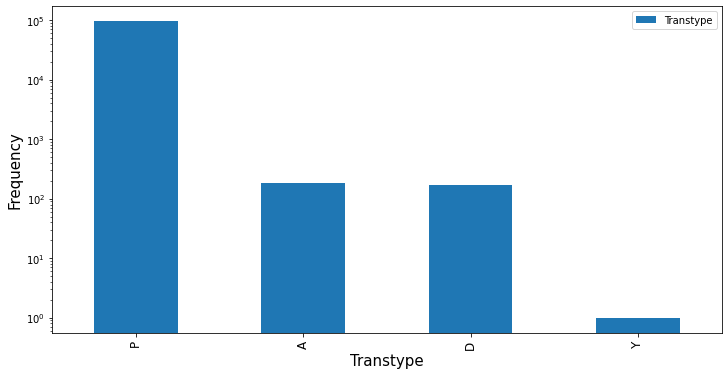

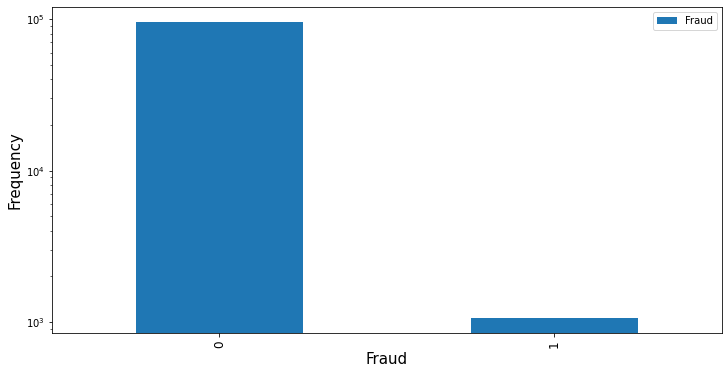

In [17]:
categoricalVars=d2.columns.tolist()
for col in categoricalVars:
    df = pd.DataFrame(d2[col].value_counts().sort_values(ascending=False).head(20))
    df.plot(kind='bar',figsize=(12,6))
    plt.xlabel(col,fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.xticks(fontsize=12)
    plt.yscale('log')

## Data Cleaning

In [26]:
data.shape

(96398, 10)

In [27]:
data_main.shape

(96753, 10)

In [32]:
data['Cardnum']=data['Cardnum'].astype('str')
data['Merchnum']=np.where((data['Merchnum']=='NaN') | (data['Merchnum']=='0'),np.nan,data['Merchnum'])
data['Merch zip']=data['Merch zip'].fillna(0).apply(lambda x:int(x))
data['Merch zip']=data['Merch zip'].apply(lambda x:str(x))
data['Merch zip']=np.where(data['Merch zip']=='0',np.nan,data['Merch zip'])
data=data.loc[data['Transtype']=='P',]
data=data.loc[data['Amount']<100000,]
data['Merch state'].fillna('Unknown',inplace=True)
data['Merch zip'].fillna('Unknown',inplace=True)
data['Merchnum'].fillna('Unknown',inplace=True)

C:\Users\karan\AppData\Local\Temp/ipykernel_11596/932205883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cardnum']=data['Cardnum'].astype('str')
C:\Users\karan\AppData\Local\Temp/ipykernel_11596/932205883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merchnum']=np.where((data['Merchnum']=='NaN') | (data['Merchnum']=='0'),np.nan,data['Merchnum'])
C:\Users\karan\AppData\Local\Temp/ipykernel_11596/932205883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [40]:
data[data['Merch description'].notnull()]['Merch description']

0         FEDEX SHP 12/23/09 AB#
1        SERVICE MERCHANDISE #81
2              OFFICE DEPOT #191
3         FEDEX SHP 12/28/09 AB#
4         FEDEX SHP 12/23/09 AB#
                  ...           
96748     BEST BUY      00001610
96749     MARKUS OFFICE SUPPLIES
96750              TECH PAC, INC
96751                    BUY.COM
96752      STAPLES NATIONAL #471
Name: Merch description, Length: 96397, dtype: object

In [33]:
merchdes_merchnum = {}
for index, merchdes in data[data['Merch description'].notnull()]['Merch description'].items():
    if merchdes not in merchdes_merchnum :
        merchdes_merchnum[merchdes] = data.loc[index, 'Merchnum']

# fill in by mapping with Merch description
data['Merchnum'] = data['Merchnum'].fillna(data['Merch description'].map(merchdes_merchnum))

# assign unknown for adjustments transactions
data['Merchnum'] = data['Merchnum'].mask(data['Merch description'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
data['Merchnum'] = data['Merchnum'].mask(data['Merch description'] == 'RETAIL DEBIT ADJUSTMENT', 'unknown')

In [34]:
merchdes_merchnum

{'FEDEX SHP 12/23/09 AB#': '5509006296254',
 'SERVICE MERCHANDISE #81': '61003026333',
 'OFFICE DEPOT #191': '4503082993600',
 'FEDEX SHP 12/28/09 AB#': '5509006296254',
 'FEDEX SHP 12/22/09 AB#': '5509006296254',
 'MIAMI COMPUTER SUPPLY': '6098208200062',
 'FISHER SCI ATL': '602608969534',
 'FEDEX SHP 12/21/09 AB#': '5509006296254',
 'CDW*GOVERNMENT INC': '5725000466504',
 'FISHER SCI HUS': '602608969284',
 'AMAZON.COM  *SUPERSTRE': '4353000719908',
 'FEDEX SHP 12/14/09 AB#': '5509006296254',
 'DIRKS PLUMBING/HEATING REPAIRS': '4503738417400',
 'COM*COMARK GVT ED SALE': '7234000681204',
 'FISHER SCI DAL': '602608969739',
 'PTK*PUBLISH PERFECTION': '3443000643641',
 'FEDEX SHP 12/27/09 AB#': '5509006296254',
 'MWI*DATA COM': '9765000409955',
 'FISHER SCI CHI': '602608969138',
 'FERGUSON ENTERPRISES I': '602608038586',
 'IBM INTERNET  01000025': '5000006000095',
 'HEWLETT PACKARD CO': '9050153',
 'MTT*SKYTEL': '3397000747409',
 'RADIO SHACK   00187278': '4800000627972',
 'SOCIETY OF TOX

In [12]:
d1.head(120)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.00,P,3.62,0
1,2,5142183973,2006-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.00,P,31.42,0
2,3,5142131721,2006-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.00,P,178.49,0
3,4,5142148452,2006-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.00,P,3.62,0
4,5,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.00,P,3.62,0
...,...,...,...,...,...,...,...,...,...,...
115,116,5142182128,2006-01-03,NaN,GRAINGER #973,IL,60089.00,P,327.34,0
116,117,5142122832,2006-01-03,881112880,GRAPHIC VISIONS ASSOC,MD,20877.00,P,1098.00,0
117,118,5142128435,2006-01-03,9108234610000,STAPLES #941,PA,17201.00,P,1083.27,0
118,119,5142153201,2006-01-03,8500066364265,MAG SYSTEMS INC,VA,20151.00,P,19.75,0


In [9]:
data.head(120)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.00,P,3.62,0
1,2,5142183973,2006-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.00,P,31.42,0
2,3,5142131721,2006-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.00,P,178.49,0
3,4,5142148452,2006-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.00,P,3.62,0
4,5,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.00,P,3.62,0
...,...,...,...,...,...,...,...,...,...,...
115,116,5142182128,2006-01-03,NaN,GRAINGER #973,IL,60089.00,P,327.34,0
116,117,5142122832,2006-01-03,881112880,GRAPHIC VISIONS ASSOC,MD,20877.00,P,1098.00,0
117,118,5142128435,2006-01-03,9108234610000,STAPLES #941,PA,17201.00,P,1083.27,0
118,119,5142153201,2006-01-03,8500066364265,MAG SYSTEMS INC,VA,20151.00,P,19.75,0


## Fill in Merch state

In [42]:
zip_state = {}
for index, zip5 in data[data['Merch zip'].notnull()]['Merch zip'].items():
    if zip5 not in zip_state:
        zip_state[zip5] = data.loc[index, 'Merch state']
        
zip_state['00926'] = 'PR'
zip_state['00929'] = 'PR'
zip_state['00934'] = 'PR'
zip_state['00902'] = 'PR'
zip_state['00738'] = 'PR'
zip_state['90805'] = 'CA'
zip_state['76302'] = 'TX'
zip_state['00914'] = 'PR'
zip_state['95461'] = 'CA'
zip_state['00680'] = 'PR'
zip_state['00623'] = 'PR'
zip_state['00726'] = 'PR'
zip_state['00936'] = 'PR'
zip_state['12108'] = 'NY'
zip_state['00791'] = 'PR'
zip_state['00907'] = 'PR'
zip_state['00922'] = 'PR'
zip_state['00920'] = 'PR'
zip_state['00801'] = 'VI'
zip_state['31040'] = 'GA'
zip_state['41160'] = 'KY'
zip_state['00681'] = 'PR'

merchnum_state = {}
for index, merchnum in data[data['Merchnum'].notnull()]['Merchnum'].items():
    if merchnum not in merchnum_state :
        merchnum_state [merchnum] = data.loc[index, 'Merch state']

merchdes_state = {}
for index, merchdes in data[data['Merch description'].notnull()]['Merch description'].items():
    if merchdes not in merchdes_state :
        merchdes_state [merchdes] = data.loc[index, 'Merch state']

In [44]:
# fill in by mapping with zip, merchnum and merch description
data['Merch state'] = data['Merch state'].fillna(data['Merch zip'].map(zip_state))
data['Merch state'] = data['Merch state'].fillna(data['Merchnum'].map(merchnum_state))
data['Merch state'] = data['Merch state'].fillna(data['Merch description'].map(merchdes_state))

# assign unknown for adjustments transactions
data['Merch state'] = data['Merch state'].mask(data['Merch description'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
data['Merch state'] = data['Merch state'].mask(data['Merch description'] == 'RETAIL DEBIT ADJUSTMENT', 'unknown')

## MerchZip

In [47]:
merchnum_zip = {}
for index, merchnum in data[data['Merchnum'].notnull()]['Merchnum'].items():
    if merchnum not in merchnum_zip :
        merchnum_zip [merchnum] = data.loc[index, 'Merch zip']

merchdes_zip = {}
for index, merchdes in data[data['Merch description'].notnull()]['Merch description'].items():
    if merchdes not in merchdes_zip :
        merchdes_zip [merchdes] = data.loc[index, 'Merch zip']

# fill in by mapping with merchnum and merch description
data['Merch zip'] = data['Merch zip'].fillna(data['Merchnum'].map(merchnum_zip))
data['Merch zip'] = data['Merch zip'].fillna(data['Merch description'].map(merchdes_zip))

# assign unknown for adjustments transactions
data['Merch zip'] = data['Merch zip'].mask(data['Merch zip'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
data['Merch zip'] = data['Merch zip'].mask(data['Merch zip'] == 'RETAIL DEBIT ADJUSTMENT', 'unknown')

# fill the rest with unknown
data = data.fillna('unknown')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             96397 non-null  int64  
 1   Cardnum            96397 non-null  object 
 2   Date               96397 non-null  object 
 3   Merchnum           96397 non-null  object 
 4   Merch description  96397 non-null  object 
 5   Merch state        96397 non-null  object 
 6   Merch zip          96397 non-null  object 
 7   Transtype          96397 non-null  object 
 8   Amount             96397 non-null  float64
 9   Fraud              96397 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 10.1+ MB
